In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
def convert_time(x):
    if x[-1]=='o':
        return int(datetime.date.today().strftime("%Y"))
    elif x[-1]=='e':
        return np.nan
    else:
        return int(datetime.datetime.strptime(x,' %B %d, %Y').strftime("%Y"))

data=pd.read_csv("/Users/jason/Documents/BIA study/Web Mining/Final Project/Data mining/Archive/1.csv",header=0)
data["Date"]=data["Date"].apply(convert_time)

In [24]:
data

,Date,Description,Name,Reting,rating_count,reviews_count,label,noun,adjective
0,2018.0,The host is very friendly and welcoming. He is...,Amber N.,5,1,1,1,"host,experience","friendly,great knowledgeable"
1,2018.0,it was a great experience!! me and my family ...,Timi C.,5,13,2,1,"owner, experience","great, friendly"
2,2019.0,Robert is a great host! It great for a date ni...,Leanna W.,4,2,2,1,host,great
3,2018.0,The instructor was very nice and knowledgeable...,Indira T.,5,2,2,1,"instructor,wine","nice,knowledgable,delicious"
4,2018.0,"FULLY RECOMMEND! First and foremost, my motive...",Brianna A.,5,1,1,1,"knowledge,instructor",general
5,2018.0,Was a great experience. Robert was a great ins...,Michael M.,5,1,1,1,"experience,instructor",great
6,2019.0,Was a great experience I'll definitely do it ...,Brenda N.,5,1,1,1,experience,great
7,2018.0,A frequent flyer to bar academy! Rob makes the...,Leah S.,5,12,6,1,experience,great
8,2019.0,Rob was an awesome host. \nVery knowledgeable.,Tracey I.,5,8,2,1,host,"awesome,knowledgeable"
9,2018.0,This Groupon was such a good choice. The host ...,Jennifer R.,4,16,7,1,"choice,host,wine","good,knowledgeable,amazing"


        count      mean       std  min  25%  50%  75%  max
Date                                                      
2015.0    3.0  5.000000  0.000000  5.0  5.0  5.0  5.0  5.0
2016.0   33.0  4.454545  1.276982  1.0  5.0  5.0  5.0  5.0
2017.0   78.0  4.782051  0.766971  1.0  5.0  5.0  5.0  5.0
2018.0   90.0  4.900000  0.368721  3.0  5.0  5.0  5.0  5.0
2019.0   26.0  4.769231  0.815239  1.0  5.0  5.0  5.0  5.0


[]

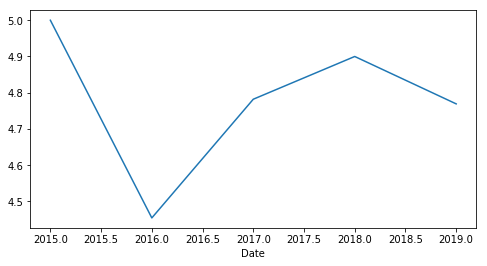

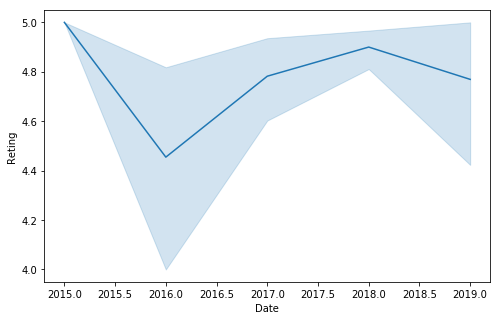

In [30]:
#The tendency for the average rating in one store by year

print(data["Reting"].groupby(data["Date"]).describe())

plt.figure(figsize=(8,5))
data["Reting"].groupby(data["Date"]).mean().plot(kind='line', figsize=(8,4))
plt.plot()

plt.figure(figsize=(8,5))
sns.lineplot(x="Date",y="Reting",data=data)
plt.plot()


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


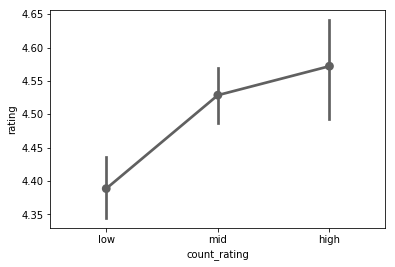

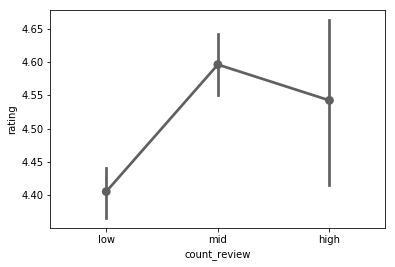

In [13]:
#Find the relation between the number of reviews or rating that each people has and rating value
count_rating=[]
count_review=[]
rating=[]
mean_v=[]
lenth=[]
for i in range(1,30):
    name=i.__str__()
    data=pd.read_csv("/Users/jason/Documents/BIA study/Web Mining/Final Project/Data mining/Archive/"+name+".csv",header=0)
    data=data.dropna(axis=0, how='any')
    for j in data["Reting"]:
        rating.append(j)
    for j in data["rating_count"]:
        count_rating.append(j)
    for j in data["reviews_count"]:
        count_review.append(j)   
    lenth.append(len(data["Reting"]))
    mean_v.append(np.mean(data["Reting"]))
dt = pd.DataFrame(list(zip(rating,count_rating,count_review)), columns=['rating','count_rating','count_review'])

dt1=dt.copy()
dt1['count_rating'].loc[dt['count_rating'] <4] = 'low'
dt1['count_rating'].loc[(dt['count_rating'] >=4) & (dt['count_rating'] <20)] = 'mid'
dt1['count_rating'].loc[dt['count_rating'] >=20] = 'high'

dt1['count_review'].loc[dt['count_review'] <4] = 'low'
dt1['count_review'].loc[(dt['count_review'] >=4) & (dt['count_review'] <20)] = 'mid'
dt1['count_review'].loc[dt['count_review'] >=20] = 'high'

sns.pointplot(x='count_rating',y='rating', data=dt1,color='#606060',alpha=0.8)
plt.show()
sns.pointplot(x='count_review',y='rating', data=dt1,color='#606060',alpha=0.8)
plt.show()

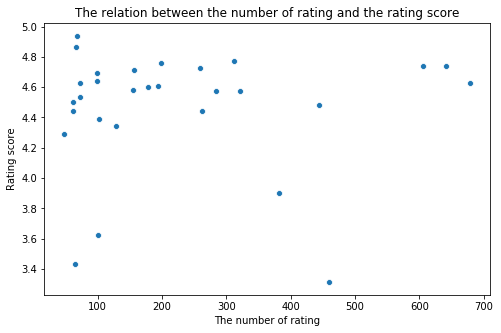

In [21]:
#find the relation between the number of rating and the rating score in these wine bars
dt4 = pd.DataFrame(list(zip(mean_v,lenth)), columns=['mean_v','lenth'])
plt.figure(figsize=(8,5))
sns.scatterplot(x="lenth",y="mean_v",data=dt4)
plt.xlabel("The number of rating")
plt.ylabel("Rating score")
plt.title("The relation between the number of rating and the rating score")
plt.show()

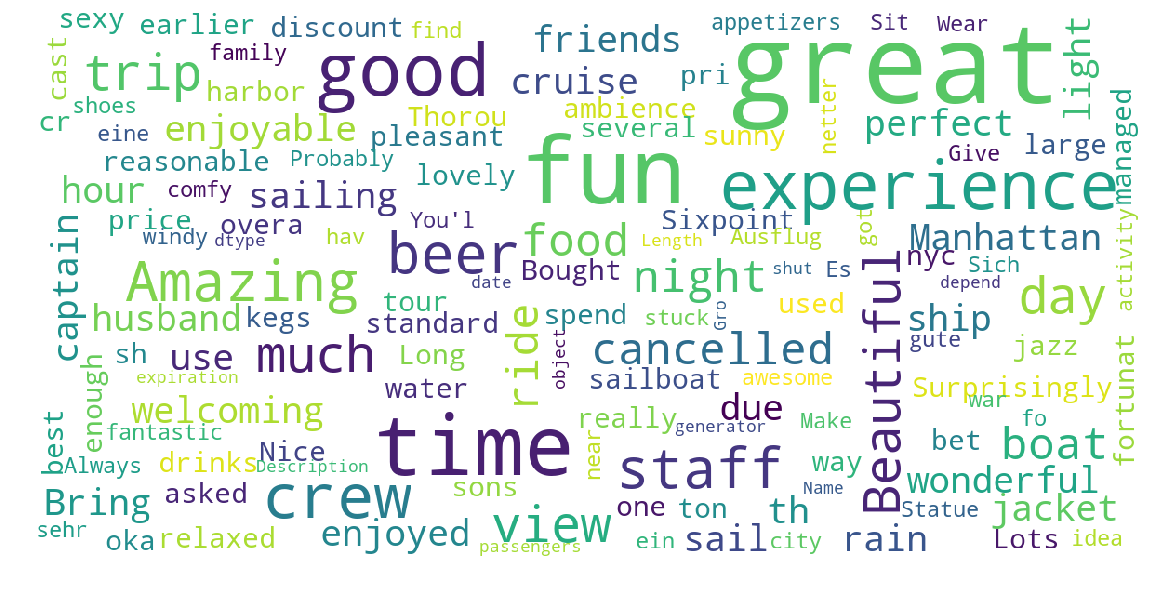

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# show  what kind of words appear most in our reviews
wordcloud = WordCloud(background_color = 'white',max_words = 200,max_font_size = 40, scale = 3,random_state = 42).generate(str(data["Description"]))
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()